In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
drama_df = pd.read_excel("../data/crawling_all_drama_20230914.xlsx", index_col=0)
drama_df.head()

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1,49231,Move to Heaven,무브 투 헤븐,2021.0,[Kim Sung Ho],[Yoon Ji Ryun],South Korea,Drama,10,3120.0,...,Friday,[Netflix],18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,11,83,"Life, Drama",75895,9.2,38142
2,702267,Weak Hero Class 1,약한영웅 Class 1,2022.0,[You Su Min],[You Su Min],South Korea,Drama,8,2400.0,...,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,158,"Action, Youth, Drama",52416,9.1,26474
3,57173,Hospital Playlist Season 2,슬기로운 의사생활++,2021.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,6000.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,154,"Romance, Life, Drama, Medical",52683,9.1,25263
4,54625,Flower of Evil,악의 꽃,2020.0,"[Kim Chul Gyu,Yoon Jong Ho]",[Yoo Jung Hee],South Korea,Drama,16,4200.0,...,"Wednesday, Thursday",[tvN],15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,21,28,"Thriller, Romance, Crime, Melodrama",108058,9.1,51352
5,36269,Hospital Playlist,슬기로운 의사 생활,2020.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,5400.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,The stories of people going through their days...,24,49,"Romance, Life, Drama, Medical",90332,9.1,41141


In [5]:
drama_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 1 to 1702
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drama_id      1702 non-null   int64  
 1   drama_name    1702 non-null   object 
 2   kor_name      1699 non-null   object 
 3   year          1699 non-null   float64
 4   director      1702 non-null   object 
 5   screenwriter  1702 non-null   object 
 6   country       1702 non-null   object 
 7   type          1702 non-null   object 
 8   tot_eps       1702 non-null   int64  
 9   duration      1683 non-null   float64
 10  start_dt      1702 non-null   object 
 11  end_dt        1560 non-null   object 
 12  aired_on      1498 non-null   object 
 13  org_net       1336 non-null   object 
 14  content_rt    1702 non-null   object 
 15  synopsis      1564 non-null   object 
 16  rank          1702 non-null   int64  
 17  pop           1702 non-null   int64  
 18  genres        1699 non-null   obj

In [6]:
drama_df['content_rt'].unique()

array(['18+ Restricted (violence & profanity)', '15+ - Teens 15 or older',
       '13+ - Teens 13 or older', 'G - All Ages', 'Not Yet Rated',
       'R - Restricted Screening (nudity & violence)'], dtype=object)

In [7]:
drama_df['org_net'].unique()

array(['[Netflix]', nan, '[Netflix,  tvN]', '[tvN]', '[SBS]',
       '[ENA,  Netflix]', '[jTBC,  Netflix,  TVING]', '[TVING,  tvN]',
       '[SBS,  ViuTV]', '[MBC,  Netflix]', '[Netflix,  OCN]',
       '[MBC,  Viki]', '[jTBC]', '[MBC]', '[KBS2]', '[OCN]',
       '[Netflix,  SBS]', '[TVING]', '[DRAMAcube,  ENA,  SBS,  SBS Plus]',
       '[KBS2,  ViuTV]', '[jTBC,  Netflix]', '[jTBC,  Viki]',
       '[Hulu,  MBC]', '[jTBC,  ViuTV]', '[iQiyi,  tvN]', '[OCN,  tvN]',
       '[Disney+,  Hulu]', '[ViuTV]', '[Daum Kakao TV,  Netflix]',
       '[Netflix,  OCN,  tvN]', '[Netflix,  TVING,  tvN]',
       '[tvN,  ViuTV]', '[iQiyi,  jTBC]', '[KBS2,  Netflix]',
       '[MBC,  ViuTV]', '[Daum Kakao TV]', '[ENA,  SBS,  SBS Plus]',
       '[Disney+]', '[ENA,  Genie TV]', '[Channel A]',
       '[iQiyi,  KBS2,  Viki]', '[Naver TV Cast]', '[MBN]',
       '[Naver TV Cast,  vLive]', '[TV Chosun]', '[Amazon Prime,  jTBC]',
       '[MBC,  Naver TV Cast,  vLive]', '[Viki]',
       '[Naver TV Cast,  Viki]', '[Ama

In [8]:
import re

def change_orgnet(item):
    if isinstance(item, float):
        return item
    
    ch = {"Channel A": "ChannelA",
          "Amazon Prime": "AmazonPrime",
          "KBS1": "KBS",
          "KBS2": "KBS",
          "TV Chosun": "TVChosun",
          "Tencent Video": "TencetVideo",
          "On Style": "OnStyle",
          "Daum Kakao TV": "KakaoTV",
          "Naver TV Cast": "NaverTVCast",
          "BS TV Tokyo": "BSTVTokyo",
          "Genie TV": "GenieTv",
          "Sohu TV": "SohuTv",
          "SBS Plus": "SBS",
          "MBC every1": "MBC",
          "LINE TV" : "LINETV"}
    for k, v in ch.items():
        item = re.sub(k, v, item)

    return item

drama_df['org_net'] = drama_df['org_net'].apply(change_orgnet)
drama_df['org_net'].to_excel("../data/org_net_list.xlsx")

In [9]:
from collections import Counter

def count_elements(item):
    counter = Counter(str(item).replace('[', '').replace(']', '').split(","))
    return counter

In [10]:
count_org_df = drama_df['org_net'].apply(count_elements)

tmp = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            tmp[k.strip()] += v
        except:
            tmp[k.strip()] = v

tmp

{'Netflix': 137,
 'nan': 366,
 'tvN': 170,
 'SBS': 150,
 'ENA': 20,
 'jTBC': 105,
 'TVING': 37,
 'ViuTV': 18,
 'MBC': 153,
 'OCN': 49,
 'Viki': 94,
 'KBS': 177,
 'DRAMAcube': 2,
 'Hulu': 15,
 'iQiyi': 21,
 'Disney+': 13,
 'KakaoTV': 23,
 'GenieTv': 19,
 'ChannelA': 12,
 'NaverTVCast': 283,
 'MBN': 13,
 'vLive': 96,
 'TVChosun': 16,
 'AmazonPrime': 7,
 'DramaX': 8,
 'SohuTv': 2,
 'TencetVideo': 3,
 'Oksusu': 10,
 'EBS': 2,
 'OnStyle': 4,
 'XtvN': 1,
 "O'live": 3,
 'LINETV': 3,
 'Tooniverse': 11,
 'Mnet': 2,
 'AbemaTV': 1,
 'BSTVTokyo': 1,
 'MBC Dramanet': 6,
 'E-Channel': 1,
 'OBS': 1,
 'Kocowa': 1,
 'FTV': 1,
 'QTV': 1}

In [11]:
s = 0
for v in tmp.values():
    s += v
s

2058

In [12]:
len(drama_df)

1702

In [13]:
import time

for i in drama_df.index:
    air_start = drama_df.loc[i, 'start_dt']
    air_end = drama_df.loc[i, 'end_dt']
    air_on = drama_df.loc[i, 'aired_on']
    org_net = drama_df.loc[i, 'org_net']

    try:
        air_start = time.strftime("%Y-%m-%d", time.strptime(air_start, "%b %d, %Y"))
        air_end = time.strftime("%Y-%m-%d", time.strptime(air_end, "%b %d, %Y"))
    except:
        pass

    # air_on = air_on.split(", ") if "," in air_on else air_on
    # if isinstance(air_on, str):
    #     air_on = air_on.astype(object)
    
    # if not isinstance(org_net, float):
    #     org_net = org_net.split(" ") if " " in org_net else org_net
    #     if isinstance(org_net, str):
    #         org_net = org_net.astype(object)

    # print(org_net)
    drama_df.loc[i, 'start_dt'] = air_start
    drama_df.loc[i, 'end_dt'] = air_end
    # drama_df.ix[i, 'aired_on'] = [', '.join(air_on)]
    # drama_df.loc[i, 'org_net'] = org_net

drama_df

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1,49231,Move to Heaven,무브 투 헤븐,2021.0,[Kim Sung Ho],[Yoon Ji Ryun],South Korea,Drama,10,3120.0,...,Friday,[Netflix],18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,11,83,"Life, Drama",75895,9.2,38142
2,702267,Weak Hero Class 1,약한영웅 Class 1,2022.0,[You Su Min],[You Su Min],South Korea,Drama,8,2400.0,...,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,158,"Action, Youth, Drama",52416,9.1,26474
3,57173,Hospital Playlist Season 2,슬기로운 의사생활++,2021.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,6000.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,154,"Romance, Life, Drama, Medical",52683,9.1,25263
4,54625,Flower of Evil,악의 꽃,2020.0,"[Kim Chul Gyu,Yoon Jong Ho]",[Yoo Jung Hee],South Korea,Drama,16,4200.0,...,"Wednesday, Thursday",[tvN],15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,21,28,"Thriller, Romance, Crime, Melodrama",108058,9.1,51352
5,36269,Hospital Playlist,슬기로운 의사 생활,2020.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,5400.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,The stories of people going through their days...,24,49,"Romance, Life, Drama, Medical",90332,9.1,41141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,726839,The Escape Story of a Plastic Spoon,흙수저 탈출기,2022.0,[],[],South Korea,Drama,2,240.0,...,NaN,NaN,Not Yet Rated,NaN,91292,99999,NaN,32,4.2,3
1699,715801,Temperature: First,온도,2017.0,[],[],South Korea,Drama,6,300.0,...,"Monday, Thursday",NaN,Not Yet Rated,NaN,91316,99999,Romance,14,3.6,3
1700,687389,High! Touch,하이!터치,2021.0,[Kim Sang Yoon],[Kim Sang Yoon],South Korea,Drama,6,240.0,...,Friday,[NaverTVCast],15+ - Teens 15 or older,"""High! Touch"" is a child's dream come true hig...",36793,16703,"Romance, Youth, Drama",207,7.3,3
1701,715801,Temperature: First,온도,2017.0,[],[],South Korea,Drama,6,300.0,...,"Monday, Thursday",NaN,Not Yet Rated,NaN,64418,99999,Romance,19,3.6,3


In [14]:
drama_df[['start_dt', 'end_dt']]

,start_dt,end_dt
1,2021-05-14,NaN
2,2022-11-18,NaN
3,2021-06-17,2021-09-16
4,2020-07-29,2020-09-23
5,2020-03-12,2020-05-28
...,...,...
1698,2022-04-25,2022-05-01
1699,2017-02-27,2017-03-23
1700,2021-02-19,2021-04-23
1701,2017-02-27,2017-03-23


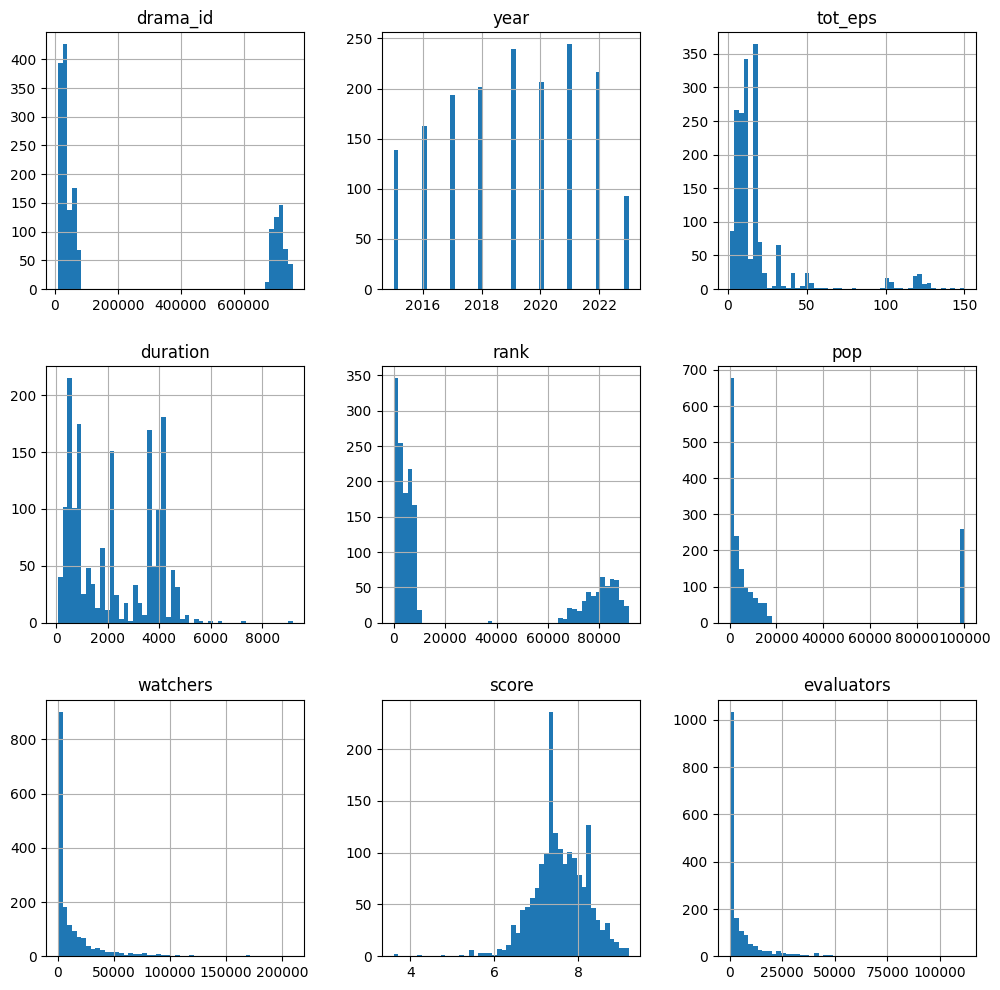

In [15]:
drama_df.hist(bins=50, figsize=(12,12))
plt.show()

In [16]:
drama_df.loc[drama_df['tot_eps'] > 120].head()

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
652,20266,Still Loving You,빛나라 은수,2016.0,[Kwak Gi Won],[Kim Min Joo],South Korea,Drama,125,2100.0,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[KBS],15+ - Teens 15 or older,"The tale of former teacher and student, Oh Eun...",4140,5328,"Romance, Drama, Melodrama",1707,7.7,511
662,28480,Sunny Again Tomorrow,내일도 맑음,2018.0,[Uh Soo Sun],[Kim Min Joo],South Korea,Drama,121,2100.0,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[KBS],15+ - Teens 15 or older,Ha Nee has been working in part-time jobs afte...,4227,4176,"Romance, Drama",2509,7.7,792
670,737913,The Love in Your Eyes,내 눈에 콩깍지,2022.0,[Go Young Tak],[Na Seung Hyun],South Korea,Drama,123,1620.0,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[KBS],15+ - Teens 15 or older,"Young Yi lost her husband at a young age, but ...",4434,5913,"Romance, Drama",1451,7.6,388
715,26062,Enemies from the Past,전생에 웬수들,2017.0,[Kim Heung Dong],[Kim Ji Eun],South Korea,Drama,123,2100.0,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[MBC],15+ - Teens 15 or older,"After Go Ya’s dad had an affair ten years ago,...",4744,7790,"Romance, Family, Melodrama",923,7.6,217
718,20452,Golden Pouch,황금주머니,2016.0,[Kim Dae Jin],[Lee Hye Seon],South Korea,Drama,122,2100.0,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[MBC],15+ - Teens 15 or older,"In the drama ""Golden Pouch”, Seok Hoon, a geni...",4754,5339,"Food, Romance, Drama, Melodrama",1700,7.6,407


# In Rank 한 데이터들

In [17]:
drama_df_in_rank = drama_df.loc[drama_df['rank']<=10000]
drama_df_in_rank

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1,49231,Move to Heaven,무브 투 헤븐,2021.0,[Kim Sung Ho],[Yoon Ji Ryun],South Korea,Drama,10,3120.0,...,Friday,[Netflix],18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,11,83,"Life, Drama",75895,9.2,38142
2,702267,Weak Hero Class 1,약한영웅 Class 1,2022.0,[You Su Min],[You Su Min],South Korea,Drama,8,2400.0,...,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,158,"Action, Youth, Drama",52416,9.1,26474
3,57173,Hospital Playlist Season 2,슬기로운 의사생활++,2021.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,6000.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,154,"Romance, Life, Drama, Medical",52683,9.1,25263
4,54625,Flower of Evil,악의 꽃,2020.0,"[Kim Chul Gyu,Yoon Jong Ho]",[Yoo Jung Hee],South Korea,Drama,16,4200.0,...,"Wednesday, Thursday",[tvN],15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,21,28,"Thriller, Romance, Crime, Melodrama",108058,9.1,51352
5,36269,Hospital Playlist,슬기로운 의사 생활,2020.0,[Shin Won Ho],[Lee Woo Jung],South Korea,Drama,12,5400.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,The stories of people going through their days...,24,49,"Romance, Life, Drama, Medical",90332,9.1,41141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,15154,Under the Black Moonlight,검은 달빛 아래서,2016.0,[],[],South Korea,Drama,9,600.0,...,Tuesday,[SBS],13+ - Teens 13 or older,The drama revolves about incidents that take p...,9342,4364,"Thriller, Mystery, Horror, Drama",2347,6.0,901
1182,15153,Magic Cell Phone,마법의 핸드폰,2016.0,[Kwon Nam Ki],[],South Korea,Drama,10,600.0,...,NaN,NaN,13+ - Teens 13 or older,The drama revolves around the romance between ...,9361,5303,Romance,1720,5.8,670
1183,714433,Blue of Winter,유도 소년,2022.0,[],[],South Korea,Drama,5,600.0,...,"Tuesday, Thursday",[Viki],Not Yet Rated,Ji Seok and Do Jin meet Hyeon Woo during high ...,9363,1877,"Romance, Youth, Martial Arts, Sports",7005,5.8,2483
1184,14826,28 Faces of the Moon,28개의달,2016.0,[],[],South Korea,Drama,8,600.0,...,Thursday,NaN,Not Yet Rated,A man’s life spirals downward after his fiance...,9371,6684,"Thriller, Mystery, Romance, Life",1194,5.5,398


In [18]:
drama_df_in_rank = drama_df_in_rank.loc[drama_df['pop']<=10000]
drama_df_in_rank.to_excel("../data/drama_df_in_rank_2023-09-14_ver_7.xlsx")

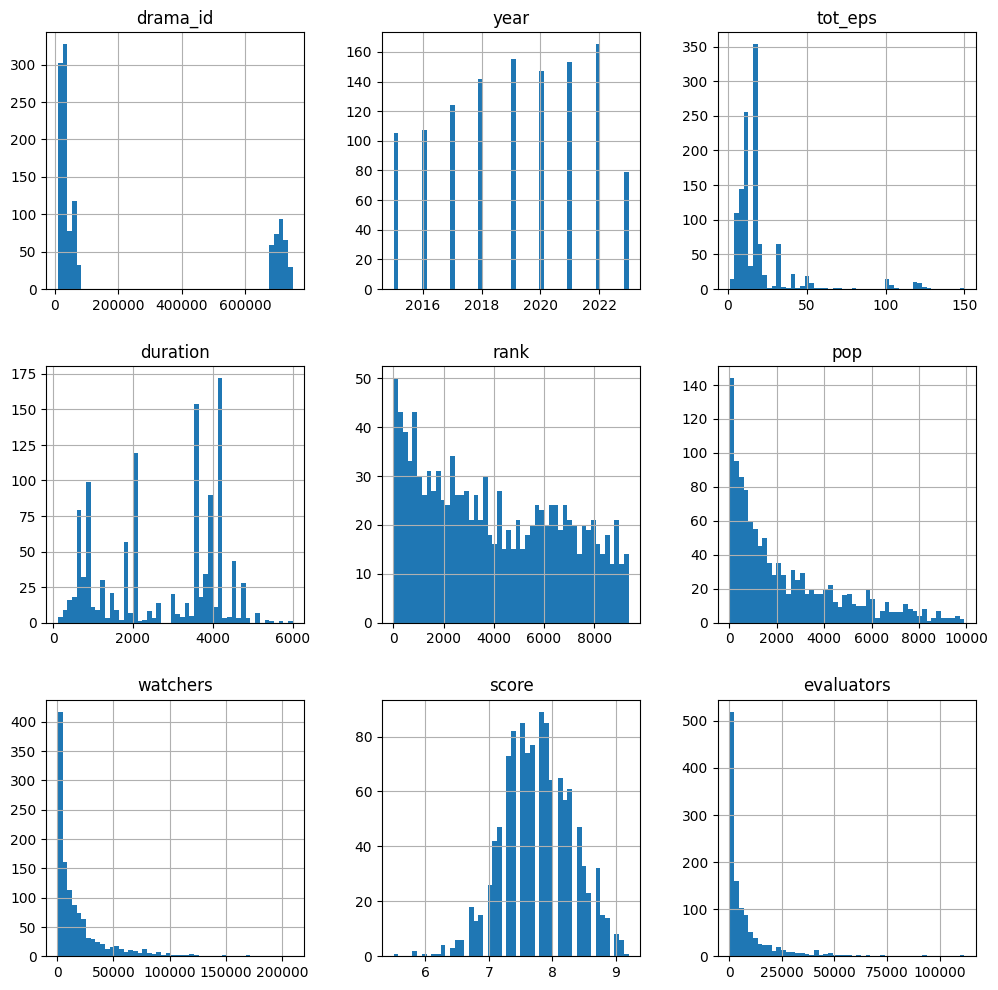

In [19]:
drama_df_in_rank.hist(bins=50, figsize=(12,12))
plt.show()

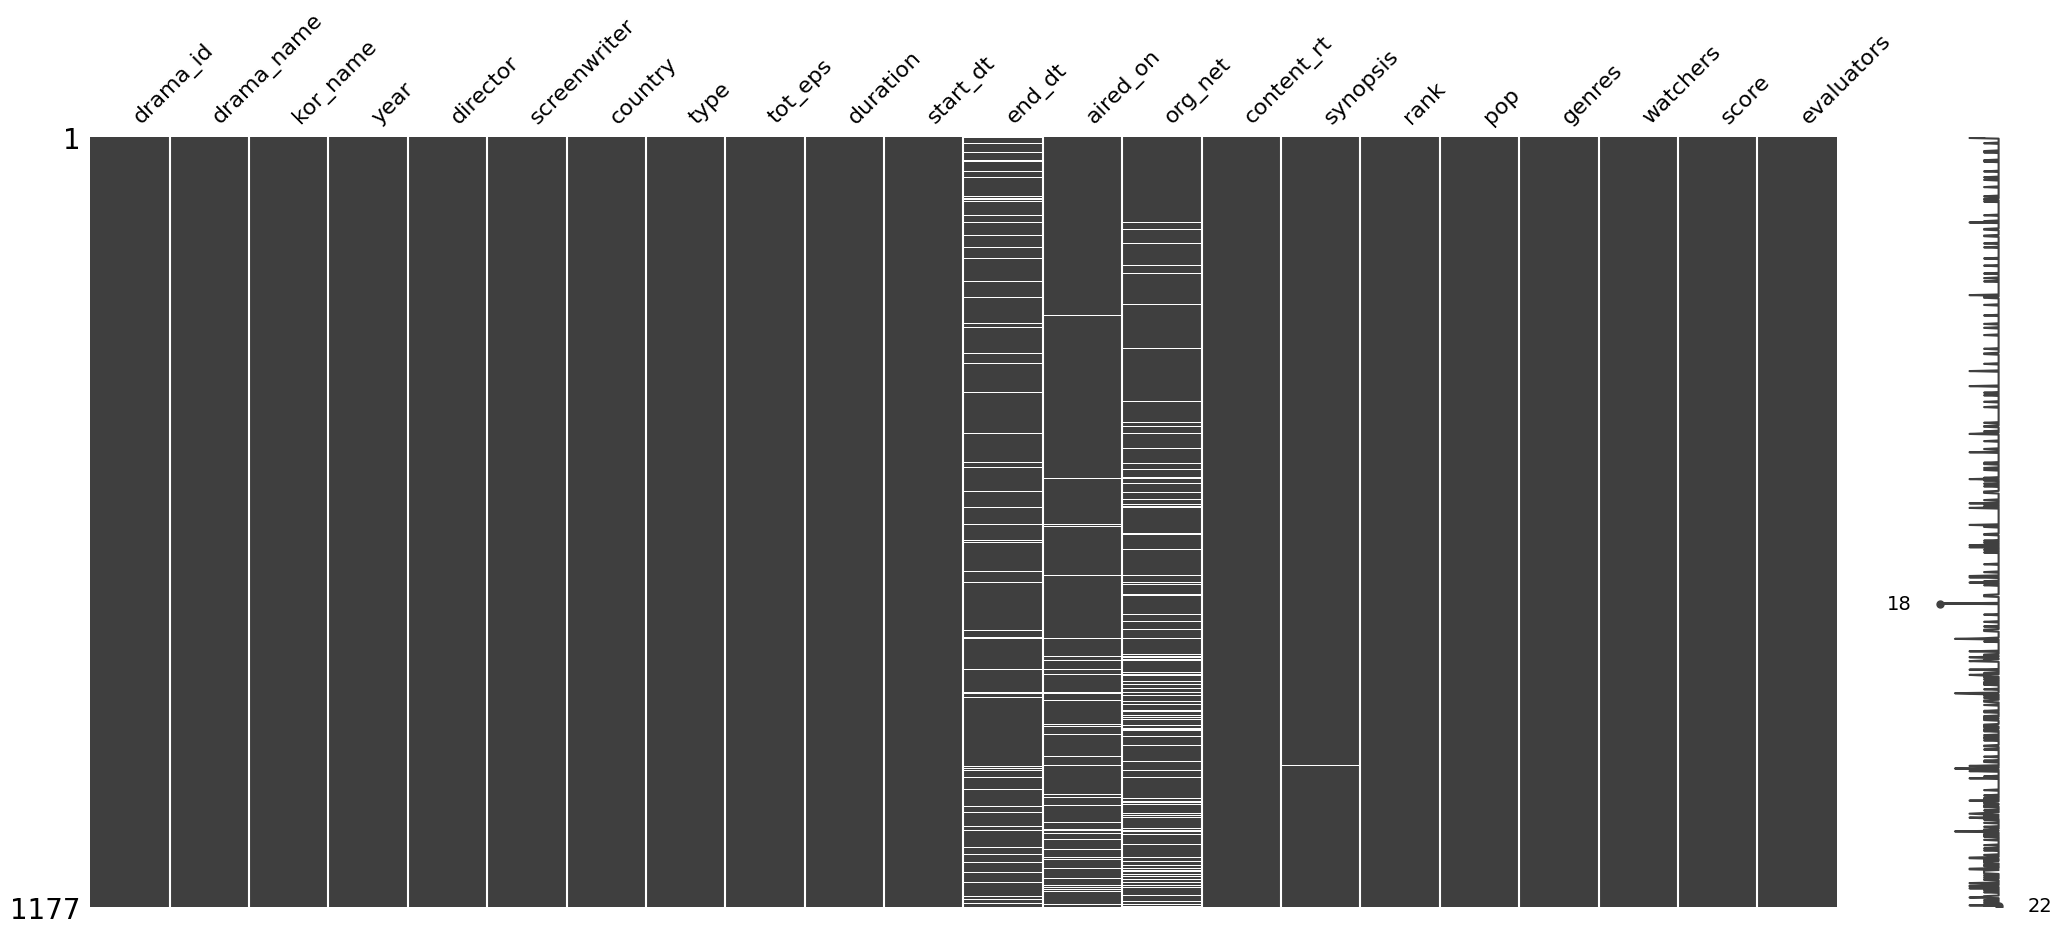

In [20]:
import missingno

missingno.matrix(drama_df_in_rank);

In [21]:
drama_df.loc[drama_df['duration'].isna()]

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1186,53607,Connect,커넥트,2019.0,[],[],South Korea,Drama,5,NaN,...,Saturday,[OBS],G - All Ages,A group of 5 friends chase mysteries.,64808,99999,"Mystery, Youth",73,8.8,4
1196,26729,A Day for Romance,연애하는 날,2017.0,[],[],South Korea,Drama,6,NaN,...,NaN,[NaverTVCast],Not Yet Rated,A drama about the love story between two coupl...,67780,99999,Drama,69,8.2,3
1200,699757,Artist Disappearance Case,작가실종사건,2021.0,[Kim Do Won],[Kim Do Won],South Korea,Drama,10,NaN,...,Friday,NaN,15+ - Teens 15 or older,About two men and women fighting against any a...,67864,99999,"Adventure, Thriller, Mystery, Fantasy",175,8.2,4
1212,19822,Three Kingdom Wars - Imjin War 1592,삼국대전 - 임진왜란1592,2016.0,[],[],South Korea,Drama,5,NaN,...,"Thursday, Friday, Saturday",[KBS],Not Yet Rated,This docudrama depicts political situations in...,68340,99999,"Historical, Documentary",181,8.1,13
1247,27886,Moonlight Sonata,달빛남녀,2017.0,[],[],South Korea,Drama,6,NaN,...,NaN,[NaverTVCast],Not Yet Rated,The story of a group of novice college graduat...,72459,99999,Drama,170,7.7,7
1309,70877,Re-Feel: If Only,리필-이프온리,2021.0,[],[Choi Yo Ji],South Korea,Drama,6,NaN,...,Wednesday,NaN,15+ - Teens 15 or older,A fantasy romantic comedy drama in which the p...,75943,7087,"Comedy, Romance, Fantasy",1089,7.5,51
1348,15244,You Will Love Me,유일랍미,2015.0,[],[],South Korea,Drama,16,NaN,...,"Thursday, Friday",[DramaX],Not Yet Rated,A romantic comedy drama about a drama writer w...,77817,9579,"Comedy, Romance, Drama",631,7.4,16
1398,79743,Meal Kid,밀키드,2020.0,[Lee Chang Han],[],South Korea,Drama,10,NaN,...,"Monday, Tuesday, Wednesday, Thursday, Friday",[NaverTVCast],15+ - Teens 15 or older,Ki Pa Ran is a data analysis expert who loves ...,80184,13238,Food,338,7.2,48
1563,16509,Webtoon Hero - Tundra Show Season 2,웹툰히어로 툰드라쇼 시즌2,2016.0,[],[],South Korea,Drama,12,NaN,...,Thursday,[MBC],Not Yet Rated,"This drama is divided in 2 stories: ""The Texts...",85000,99999,Family,114,6.9,5
1589,62663,Do You Know Love?,네가 연애를 아느냐,2016.0,[],[],South Korea,Drama,15,NaN,...,"Monday, Wednesday, Friday",[NaverTVCast],13+ - Teens 13 or older,Prince Yeongchang passed away at a young age w...,85954,99999,"Comedy, Romance, Fantasy",62,6.8,6


In [22]:
count_org_df = drama_df_in_rank['org_net'].apply(count_elements)

origin_count_dic = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            origin_count_dic[k.strip()] += v
        except:
            origin_count_dic[k.strip()] = v

origin_count_dic

{'Netflix': 136,
 'nan': 130,
 'tvN': 156,
 'SBS': 125,
 'ENA': 18,
 'jTBC': 102,
 'TVING': 34,
 'ViuTV': 18,
 'MBC': 127,
 'OCN': 49,
 'Viki': 91,
 'KBS': 151,
 'DRAMAcube': 2,
 'Hulu': 15,
 'iQiyi': 20,
 'Disney+': 13,
 'KakaoTV': 19,
 'GenieTv': 11,
 'ChannelA': 9,
 'NaverTVCast': 145,
 'MBN': 12,
 'vLive': 65,
 'TVChosun': 14,
 'AmazonPrime': 7,
 'DramaX': 5,
 'SohuTv': 2,
 'TencetVideo': 3,
 'Oksusu': 8,
 'EBS': 2,
 'OnStyle': 2,
 'XtvN': 1,
 "O'live": 1,
 'LINETV': 3,
 'Tooniverse': 2,
 'Mnet': 2,
 'AbemaTV': 1,
 'BSTVTokyo': 1,
 'MBC Dramanet': 2,
 'E-Channel': 1}

In [23]:
tmp = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            tmp[k.strip()] += v
        except:
            tmp[k.strip()] = v

tmp

{'Netflix': 136,
 'nan': 130,
 'tvN': 156,
 'SBS': 125,
 'ENA': 18,
 'jTBC': 102,
 'TVING': 34,
 'ViuTV': 18,
 'MBC': 127,
 'OCN': 49,
 'Viki': 91,
 'KBS': 151,
 'DRAMAcube': 2,
 'Hulu': 15,
 'iQiyi': 20,
 'Disney+': 13,
 'KakaoTV': 19,
 'GenieTv': 11,
 'ChannelA': 9,
 'NaverTVCast': 145,
 'MBN': 12,
 'vLive': 65,
 'TVChosun': 14,
 'AmazonPrime': 7,
 'DramaX': 5,
 'SohuTv': 2,
 'TencetVideo': 3,
 'Oksusu': 8,
 'EBS': 2,
 'OnStyle': 2,
 'XtvN': 1,
 "O'live": 1,
 'LINETV': 3,
 'Tooniverse': 2,
 'Mnet': 2,
 'AbemaTV': 1,
 'BSTVTokyo': 1,
 'MBC Dramanet': 2,
 'E-Channel': 1}

In [24]:
drama_df_in_rank['screenwriter'].values

array(['[Yoon Ji Ryun]', '[You Su Min]', '[Lee Woo Jung]', ..., '[]',
       '[]', '[]'], dtype=object)

In [25]:
writer_list = []
for lst in drama_df_in_rank['screenwriter'].values:
    tmp = []
    l = lst.replace("[", "").replace("]", "")
    if len(l) == 0:
        writer_list.append("[]")
        continue
    for writer in l.split(","):
        tmp.append(writer.replace("'", ""))
    writer_list.append("['" + "','".join(tmp) + "']")

director_list = []
for lst in drama_df_in_rank['director'].values:
    tmp = []
    l = lst.replace("[", "").replace("]", "")
    if len(l) == 0:
        director_list.append("[]")
        continue
    for director in l.split(","):
        tmp.append(director)
    director_list.append("['" + "','".join(tmp) + "']")

In [26]:
print(writer_list)

["['Yoon Ji Ryun']", "['You Su Min']", "['Lee Woo Jung']", "['Yoo Jung Hee']", "['Lee Woo Jung']", "['Hong Jung Eun','Hong Mi Ran']", "['Lee Woo Jung']", "['Park Hae Young']", "['Park Ba Ra']", "['Kim Eun Sook']", "['Kang Eun Kyung']", "['Park Ji Eun']", "['Jung Bo Hoon','Lee Woo Jung']", "['Park Kye Ok','Choi Ah Il']", "['Jung Seo Kyung']", "['Moon Ji Won']", "['Jo Yong']", "['Hong Jung Eun','Hong Mi Ran']", "['Lee Eun Mi']", "['Park Jae Bum']", "['Kim Eun Hee']", "['Kim Eun Sook']", "['Bae Se Young']", "['Kim Eun Hee']", "['Han Sang Woon']", "['Kim Eun Sook']", "['Oh Sang Ho']", "['Park Ran','Park Ja Kyung','Kim Yu Jin']", "['Han Woo Ri']", "['Choi Ran']", "['Kim Eun Sook']", "['Lee Soo Yeon']", "['Kim Sae Bom','Yeo Ji Na','Yoo Seon Dong']", "['Jung Hae Ri']", "['Kwon Do Eun']", "['Han Jun Hee','Kim Bo Tong']", "['Yoo Hyun Mi']", "['Kim Eun Hee']", "['Ban Ki Ri','Jung So Young']", "['Yang Hee Seung','Kim Soo Jin']", "['Oh Sang Ho','Lee Ji Hyun']", "['Lee Kang']", "['Seol Yi Na','Kwon

In [27]:
drama_df_in_rank['screenwriter'] = writer_list
drama_df_in_rank['director'] = director_list

C:\Users\whghd\AppData\Local\Temp\ipykernel_24680\1748638775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_df_in_rank['screenwriter'] = writer_list
C:\Users\whghd\AppData\Local\Temp\ipykernel_24680\1748638775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_df_in_rank['director'] = director_list


In [28]:
drama_df_in_rank

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1,49231,Move to Heaven,무브 투 헤븐,2021.0,['Kim Sung Ho'],['Yoon Ji Ryun'],South Korea,Drama,10,3120.0,...,Friday,[Netflix],18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,11,83,"Life, Drama",75895,9.2,38142
2,702267,Weak Hero Class 1,약한영웅 Class 1,2022.0,['You Su Min'],['You Su Min'],South Korea,Drama,8,2400.0,...,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,158,"Action, Youth, Drama",52416,9.1,26474
3,57173,Hospital Playlist Season 2,슬기로운 의사생활++,2021.0,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,6000.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,154,"Romance, Life, Drama, Medical",52683,9.1,25263
4,54625,Flower of Evil,악의 꽃,2020.0,"['Kim Chul Gyu','Yoon Jong Ho']",['Yoo Jung Hee'],South Korea,Drama,16,4200.0,...,"Wednesday, Thursday",[tvN],15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,21,28,"Thriller, Romance, Crime, Melodrama",108058,9.1,51352
5,36269,Hospital Playlist,슬기로운 의사 생활,2020.0,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,5400.0,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,The stories of people going through their days...,24,49,"Romance, Life, Drama, Medical",90332,9.1,41141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,15154,Under the Black Moonlight,검은 달빛 아래서,2016.0,[],[],South Korea,Drama,9,600.0,...,Tuesday,[SBS],13+ - Teens 13 or older,The drama revolves about incidents that take p...,9342,4364,"Thriller, Mystery, Horror, Drama",2347,6.0,901
1182,15153,Magic Cell Phone,마법의 핸드폰,2016.0,['Kwon Nam Ki'],[],South Korea,Drama,10,600.0,...,NaN,NaN,13+ - Teens 13 or older,The drama revolves around the romance between ...,9361,5303,Romance,1720,5.8,670
1183,714433,Blue of Winter,유도 소년,2022.0,[],[],South Korea,Drama,5,600.0,...,"Tuesday, Thursday",[Viki],Not Yet Rated,Ji Seok and Do Jin meet Hyeon Woo during high ...,9363,1877,"Romance, Youth, Martial Arts, Sports",7005,5.8,2483
1184,14826,28 Faces of the Moon,28개의달,2016.0,[],[],South Korea,Drama,8,600.0,...,Thursday,NaN,Not Yet Rated,A man’s life spirals downward after his fiance...,9371,6684,"Thriller, Mystery, Romance, Life",1194,5.5,398


In [29]:
drama_df_in_rank.to_excel("../data/drama_df_in_rank_2023-09-14_ver_7.xlsx")